# Data Analysis, Modelling and Predicting COVID19 Outbreak


# Importing Libraries

In [105]:
# importing libraries
import pandas as pd
import numpy as np
import plotly.graph_objects as go
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.colors as mcolors
import time
from sklearn.linear_model import LinearRegression, BayesianRidge
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error, mean_absolute_error
import datetime
import operator 

from sklearn.metrics import accuracy_score
from sklearn import metrics as ms
from sklearn.ensemble import RandomForestRegressor
import datetime

from scipy.integrate import solve_ivp
from scipy.optimize import minimize

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

color_arr = px.colors.qualitative.Dark24

# Reading datasets

In [106]:
#  About datasets - first three are time series data and last one is aggregated data.

In [107]:
# Importing confirmed cases data
confirmed_cases=pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv")
confirmed_cases.shape

(273, 400)

In [108]:
cols = confirmed_cases.keys()
confirmed_cases.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,1/12/21,1/13/21,1/14/21,1/15/21,1/16/21,1/17/21,1/18/21,1/19/21,1/20/21,1/21/21,1/22/21,1/23/21,1/24/21,1/25/21,1/26/21,1/27/21,1/28/21,1/29/21,1/30/21,1/31/21,2/1/21,2/2/21,2/3/21,2/4/21,2/5/21,2/6/21,2/7/21,2/8/21,2/9/21,2/10/21,2/11/21,2/12/21,2/13/21,2/14/21,2/15/21,2/16/21,2/17/21,2/18/21,2/19/21,2/20/21
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,...,53584,53584,53775,53831,53938,53984,54062,54141,54278,54403,54483,54559,54595,54672,54750,54854,54891,54939,55008,55023,55059,55121,55174,55231,55265,55330,55335,55359,55384,55402,55420,55445,55473,55492,55514,55518,55540,55557,55575,55580
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,64627,65334,65994,66635,67216,67690,67982,68568,69238,69916,70655,71441,72274,72812,73691,74567,75454,76350,77251,78127,78992,79934,80941,81993,83082,84212,85336,86289,87528,88671,89776,90835,91987,93075,93850,94651,95726,96838,97909,99062
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,...,102641,102860,103127,103381,103611,103833,104092,104341,104606,104852,105124,105369,105596,105854,106097,106359,106610,106887,107122,107339,107578,107841,108116,108381,108629,108629,109088,109313,109559,109782,110049,110303,110513,110711,110894,111069,111247,111418,111600,111764
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,8682,8818,8868,8946,9038,9083,9083,9194,9308,9379,9416,9499,9549,9596,9638,9716,9779,9837,9885,9937,9972,10017,10070,10137,10172,10206,10251,10275,10312,10352,10391,10427,10463,10503,10538,10555,10583,10610,10645,10672
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,18343,18425,18613,18679,18765,18875,18926,19011,19093,19177,19269,19367,19399,19476,19553,19580,19672,19723,19782,19796,19829,19900,19937,19996,20030,20062,20086,20112,20163,20210,20261,20294,20329,20366,20381,20389,20400,20452,20478,20499


In [109]:
# No. of Unique Countries in the data
confirmed_cases["Country/Region"].nunique()

192

In [110]:
# Checking Data of particular Country in confirmed cases
confirmed_cases[confirmed_cases["Country/Region"]=="Canada"]

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,1/12/21,1/13/21,1/14/21,1/15/21,1/16/21,1/17/21,1/18/21,1/19/21,1/20/21,1/21/21,1/22/21,1/23/21,1/24/21,1/25/21,1/26/21,1/27/21,1/28/21,1/29/21,1/30/21,1/31/21,2/1/21,2/2/21,2/3/21,2/4/21,2/5/21,2/6/21,2/7/21,2/8/21,2/9/21,2/10/21,2/11/21,2/12/21,2/13/21,2/14/21,2/15/21,2/16/21,2/17/21,2/18/21,2/19/21,2/20/21
39,Alberta,Canada,53.9333,-116.5765,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,112743,113618,114585,115370,116087,116837,117311,117767,118436,119114,119757,120330,120793,121535,121901,122360,122821,123364,123747,124208,124563,124831,125090,125672,126068,126416,126767,127036,127231,127570,127921,128235,128540,128824,129075,129338,129615,130030,130355,130735
40,British Columbia,Canada,53.7267,-127.6476,0,0,0,0,0,0,1,1,1,1,1,1,1,1,2,2,4,4,4,4,4,4,4,4,4,4,5,5,5,5,6,6,6,6,7,7,...,58553,59072,59608,60117,60117,60117,61447,61912,62412,62976,63484,63484,63484,64828,65234,65719,66265,66779,66779,66779,67937,68366,68780,69245,69716,69716,69716,70952,71387,71856,72305,72750,72750,72750,72750,74283,74710,75327,75835,75835
41,Diamond Princess,Canada,0.0000,0.0000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
42,Grand Princess,Canada,0.0000,0.0000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13
43,Manitoba,Canada,53.7609,-98.8139,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,26540,26695,26954,27145,27322,27511,27629,27740,27893,28089,28260,28476,28697,28810,28902,28996,29128,29280,29446,29564,29651,29733,29858,29968,30078,30158,30237,30289,30360,30417,30507,30588,30687,30766,30766,30932,31007,31145,31235,31329
44,New Brunswick,Canada,46.5653,-66.4619,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,817,836,859,884,911,947,973,1004,1025,1057,1087,1104,1124,1151,1161,1175,1202,1218,1230,1256,1264,1288,1302,1318,1325,1337,1344,1346,1361,1375,1377,1382,1398,1400,1401,1404,1407,1411,1417,1420
45,Newfoundland and Labrador,Canada,53.1355,-57.6604,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,393,393,394,395,395,396,396,396,396,397,398,398,398,398,398,400,404,408,408,408,408,408,410,411,412,415,416,427,457,510,610,660,686,697,704,711,755,803,863,901
46,Northwest Territories,Canada,64.8255,-124.8457,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,24,24,24,25,25,25,25,28,31,31,31,31,31,31,31,31,31,35,35,35,35,36,36,36,36,36,36,38,38,39,43,43,43,43,43,43,47,47,47,47
47,Nova Scotia,Canada,44.6820,-63.7443,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1534,1542,1548,1550,1554,1558,1557,1561,1564,1565,1570,1570,1571,1571,1572,1576,1576,1577,1580,1580,1581,1582,1583,1584,1584,1584,1585,1586,1587,1588,1590,1590,1592,1593,1594,1597,1600,1602,1604,1608
48,Nunavut,Canada,70.2998,-83.1076,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,266,266,266,266,266,266,266,266,266,266,267,267,280,282,282,282,283,283,284,294,294,294,294,296,296,299,299,299,299,300,303,303,308,311,311,323,324,330,332,338


In [111]:
# Importing death cases data
death_cases=pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv")
death_cases.shape

(273, 400)

In [112]:
death_cases.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,1/12/21,1/13/21,1/14/21,1/15/21,1/16/21,1/17/21,1/18/21,1/19/21,1/20/21,1/21/21,1/22/21,1/23/21,1/24/21,1/25/21,1/26/21,1/27/21,1/28/21,1/29/21,1/30/21,1/31/21,2/1/21,2/2/21,2/3/21,2/4/21,2/5/21,2/6/21,2/7/21,2/8/21,2/9/21,2/10/21,2/11/21,2/12/21,2/13/21,2/14/21,2/15/21,2/16/21,2/17/21,2/18/21,2/19/21,2/20/21
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,2301,2301,2314,2324,2336,2339,2343,2346,2354,2363,2370,2373,2378,2385,2389,2389,2397,2399,2400,2400,2404,2405,2406,2407,2407,2408,2410,2413,2414,2418,2419,2424,2427,2427,2427,2428,2428,2430,2430,2430
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1252,1256,1261,1265,1270,1277,1281,1287,1291,1296,1303,1310,1315,1324,1332,1339,1350,1358,1369,1380,1393,1398,1404,1418,1433,1446,1460,1472,1488,1503,1517,1531,1543,1555,1567,1582,1600,1617,1636,1653
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,2816,2819,2822,2827,2831,2836,2840,2843,2849,2853,2856,2861,2863,2866,2871,2877,2881,2884,2888,2891,2894,2898,2900,2904,2909,2909,2914,2918,2924,2926,2930,2932,2935,2939,2943,2945,2947,2950,2954,2958
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,86,87,88,88,91,91,91,92,92,93,93,96,96,97,97,98,100,100,101,101,101,102,103,103,104,105,106,106,106,106,106,106,107,107,107,107,107,107,107,107
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,422,424,425,428,431,436,439,442,444,448,452,457,459,461,462,462,464,464,464,466,466,468,470,473,474,475,475,475,478,487,487,490,491,492,493,494,496,498,498,498


In [113]:
# Importing recovered cases data
recovered_cases=pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv")
recovered_cases.shape

(258, 400)

In [114]:
recovered_cases.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,1/12/21,1/13/21,1/14/21,1/15/21,1/16/21,1/17/21,1/18/21,1/19/21,1/20/21,1/21/21,1/22/21,1/23/21,1/24/21,1/25/21,1/26/21,1/27/21,1/28/21,1/29/21,1/30/21,1/31/21,2/1/21,2/2/21,2/3/21,2/4/21,2/5/21,2/6/21,2/7/21,2/8/21,2/9/21,2/10/21,2/11/21,2/12/21,2/13/21,2/14/21,2/15/21,2/16/21,2/17/21,2/18/21,2/19/21,2/20/21
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,44608,44850,45298,45434,45465,45868,46359,46554,46759,46887,46912,46943,47298,47365,47459,47549,47583,47606,47609,47679,47723,47798,47982,47995,48018,48027,48041,48042,48109,48133,48279,48390,48392,48395,48433,48514,48626,48798,48803,48820
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,38421,38860,39246,39625,40090,40453,40870,41464,41969,42426,42895,43384,43890,44291,44880,45383,45906,46420,46927,47424,47922,48377,48958,49543,50219,50875,51444,52128,52933,53616,54362,55243,55983,56764,57736,58794,59684,60675,61605,62533
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,69608,69791,69992,70188,70373,70554,70747,70933,71127,71343,71552,71755,71945,72143,72336,72538,72745,72956,73152,73344,73530,73732,73940,74136,74330,74330,74692,74871,75057,75243,75436,75628,75816,75999,76168,76330,76489,76640,76797,76940
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,7930,8070,8091,8116,8116,8154,8154,8349,8399,8474,8537,8588,8652,8724,8774,8851,8942,8986,9045,9093,9206,9252,9313,9395,9444,9492,9533,9610,9674,9732,9781,9833,9868,9911,9965,10022,10066,10101,10146,10170
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,15512,15631,16008,16120,16225,16347,16677,16822,16921,17176,17223,17249,17266,17327,17388,17602,17692,17918,18015,18035,18180,18232,18335,18381,18431,18475,18540,18596,18623,18687,18710,18786,18790,18795,18884,18929,18951,18972,18991,19005


In [115]:
# Importing Country region data
countrywise_cases=pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/web-data/data/cases_country.csv")
countrywise_cases.shape

(192, 14)

In [116]:
countrywise_cases.head()

,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3
0,Afghanistan,2021-02-21 12:24:27,33.93911,67.709953,55604.0,2432.0,48834.0,4338.0,142.836809,NaN,NaN,4.373786,4,AFG
1,Albania,2021-02-21 12:24:27,41.15330,20.168300,99062.0,1653.0,62533.0,34876.0,3442.282299,NaN,NaN,1.668652,8,ALB
2,Algeria,2021-02-21 12:24:27,28.03390,1.659600,111764.0,2958.0,76940.0,31866.0,254.871931,NaN,NaN,2.646648,12,DZA
3,Andorra,2021-02-21 12:24:27,42.50630,1.521800,10672.0,107.0,10170.0,395.0,13812.204750,NaN,NaN,1.002624,20,AND
4,Angola,2021-02-21 12:24:27,-11.20270,17.873900,20499.0,498.0,19005.0,996.0,62.370939,NaN,NaN,2.429387,24,AGO


## **Imputing data**

In [117]:
# Replacing nan values
confirmed_cases= confirmed_cases.replace(np.nan,'',regex=True)
death_cases= death_cases.replace(np.nan,'',regex=True)
recovered_cases= recovered_cases.replace(np.nan,'',regex=True)
countrywise_cases= countrywise_cases.replace(np.nan,'',regex=True)


# Exploratory Analysis

For case count- Global Summary -Total cases


In [118]:
# Dropping columns which are of no use from country data
data_global=countrywise_cases.drop(['Lat','Long_','Country_Region','Last_Update','Incident_Rate','People_Tested','People_Hospitalized','Mortality_Rate','UID','ISO3'],axis=1)
data_global.dropna(inplace=True)

In [119]:
# Getting total sum to find total confirmed, deaths and active cases globally
sum_global=data_global.sum().astype(int)
sum_global

Confirmed    111157192
Deaths         2462102
Active        45997094
dtype: int64

## Plotting the total confirmed cases globally wrt date

---



In [120]:
# Getting worldwise cases datewise 
confirmed = confirmed_cases.loc[:, cols[4]:cols[-1]]
sum_confirmed=confirmed.sum()
sum_confirmed

1/22/20          557
1/23/20          655
1/24/20          941
1/25/20         1433
1/26/20         2118
             ...    
2/16/21    109507754
2/17/21    109902832
2/18/21    110306030
2/19/21    110725024
2/20/21    111073864
Length: 396, dtype: int64

In [121]:
sum_confirmed.index

Index(['1/22/20', '1/23/20', '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       '1/28/20', '1/29/20', '1/30/20', '1/31/20',
       ...
       '2/11/21', '2/12/21', '2/13/21', '2/14/21', '2/15/21', '2/16/21',
       '2/17/21', '2/18/21', '2/19/21', '2/20/21'],
      dtype='object', length=396)

In [122]:
sum_confirmed.values.transpose()

array([      557,       655,       941,      1433,      2118,      2927,
            5578,      6167,      8235,      9927,     12038,     16787,
           19887,     23898,     27643,     30803,     34396,     37130,
           40160,     42769,     44811,     45229,     60382,     66909,
           69052,     71235,     73270,     75152,     75652,     76212,
           76841,     78602,     78982,     79546,     80399,     81376,
           82736,     84122,     86013,     88394,     90377,     92971,
           95279,     98090,    102003,    106098,    110047,    114219,
          119041,    126702,    132492,    146876,    157950,    169219,
          184027,    199970,    219534,    246583,    277358,    309349,
          344205,    387040,    428219,    479220,    542097,    607138,
          674418,    733655,    798949,    875794,    958586,   1041649,
         1125200,   1183589,   1256181,   1329324,   1399153,   1482508,
         1569527,   1655062,   1729373,   1849067, 

In [123]:
# plot confirmed cases globally
fig_confirmed=go.Figure(data=go.Scatter(x=sum_confirmed.index , y=sum_confirmed.values, mode='lines+markers'))
fig_confirmed.update_layout(title="Total Coronavirus Confirmed Cases(Globally)",yaxis_title="Confirmed_Cases",xaxis_title="Dates",xaxis_tickangle=1000)
fig_confirmed.show()

# Complete Analysis of Data


In [124]:
# Dropping unwanted columns
aggregate_confirmed = confirmed_cases.copy().drop(['Lat','Long','Country/Region','Province/State'],axis=1).sum()
aggregate_death = death_cases.copy().drop(['Lat','Long','Country/Region','Province/State'],axis=1).sum()
aggregate_recovered = recovered_cases.copy().drop(['Lat','Long','Country/Region','Province/State'],axis=1).sum()

# There is no timeseries data for active cases, therefore it needs to be engineered separately
aggregate_active = pd.Series(data = np.array([x1 - x2 -x3 for (x1, x2, x3) in zip(aggregate_confirmed.values, aggregate_death.values, aggregate_recovered.values)]), index = aggregate_confirmed.index)

In [125]:
# Plot and add traces for the aggregate time series
fig=go.Figure()

fig.add_trace(go.Scatter(x=aggregate_confirmed.index,y=aggregate_confirmed.values,name="Confirmed"))
fig.add_trace(go.Scatter(x=aggregate_death.index,y=aggregate_death.values,name="Death"))
fig.add_trace(go.Scatter(x=aggregate_recovered.index,y=aggregate_recovered.values, name="Recovered"))
fig.add_trace(go.Scatter(x=aggregate_active.index,y=aggregate_active.values, name="Active"))
fig.update_layout(title="Complete analysis of data",yaxis_title="Cases count", xaxis_title="Date")
fig.show()

In [126]:
# Top 5 countries (in terms of confirmed cases)

df1=countrywise_cases.copy().drop(['Lat','Long_','Last_Update','Mortality_Rate','UID','ISO3','Incident_Rate','People_Tested','People_Hospitalized'],
                       axis=1).sort_values('Confirmed',ascending=False).reset_index(drop=True)
df1.head()

,Country_Region,Confirmed,Deaths,Recovered,Active
0,US,28078638.0,497670.0,,27580880.0
1,India,10991651.0,156302.0,1.06897e+07,145634.0
2,Brazil,10139148.0,245977.0,9.07050e+06,822666.0
3,Russia,4117992.0,81926.0,3.67208e+06,363982.0
4,United Kingdom,4117739.0,120593.0,11293,3985853.0


In [127]:
#Top 20 countries (in terms of confirmed cases)
df1.dropna(axis=0,inplace=True)
df1['Deaths'] = pd.to_numeric(df1['Deaths'], errors='coerce')
df1['Recovered'] = pd.to_numeric(df1['Recovered'], errors='coerce')
df1['Active'] = pd.to_numeric(df1['Active'], errors='coerce')
df1.head(20)

,Country_Region,Confirmed,Deaths,Recovered,Active
0,US,28078638.0,497670.0,NaN,27580880.0
1,India,10991651.0,156302.0,10689715.0,145634.0
2,Brazil,10139148.0,245977.0,9070505.0,822666.0
3,Russia,4117992.0,81926.0,3672084.0,363982.0
4,United Kingdom,4117739.0,120593.0,11293.0,3985853.0
5,France,3597113.0,83546.0,253337.0,3259287.0
6,Spain,3133122.0,67101.0,150376.0,2915645.0
7,Italy,2795796.0,95486.0,2315687.0,384623.0
8,Turkey,2631876.0,27983.0,2518758.0,85135.0
9,Germany,2392839.0,67887.0,2197195.0,127757.0


# India 


In [128]:
# getting confirmed, recovered, deaths and active in India
confirmed_India = confirmed_cases[confirmed_cases['Country/Region'] == "India"]
confirmed_India = confirmed_India.drop(['Lat', 'Long', 'Country/Region', 'Province/State'], axis = 1).reset_index(drop = True).sum()
confirmed_India

1/22/20           0
1/23/20           0
1/24/20           0
1/25/20           0
1/26/20           0
             ...   
2/16/21    10937320
2/17/21    10950201
2/18/21    10963394
2/19/21    10977387
2/20/21    10991651
Length: 396, dtype: int64

In [129]:
deaths_India = death_cases[death_cases['Country/Region'] == "India"]
deaths_India = deaths_India.drop(['Lat', 'Long', 'Country/Region', 'Province/State'], axis = 1).reset_index(drop = True).sum()
deaths_India

1/22/20         0
1/23/20         0
1/24/20         0
1/25/20         0
1/26/20         0
            ...  
2/16/21    155913
2/17/21    156014
2/18/21    156111
2/19/21    156212
2/20/21    156302
Length: 396, dtype: int64

In [130]:
recovered_India = recovered_cases[recovered_cases['Country/Region'] == "India"]
recovered_India = recovered_India.drop(['Lat', 'Long', 'Country/Region', 'Province/State'], axis = 1).reset_index(drop = True).sum()
recovered_India

1/22/20           0
1/23/20           0
1/24/20           0
1/25/20           0
1/26/20           0
             ...   
2/16/21    10644858
2/17/21    10656845
2/18/21    10667741
2/19/21    10678048
2/20/21    10689715
Length: 396, dtype: int64

In [131]:
active_India = pd.Series(data = np.array([x1 - x2 - x3 for (x1, x2, x3) in zip(confirmed_India.values, deaths_India.values,recovered_India.values)]), 
                            index = confirmed_India.index)
active_India


1/22/20         0
1/23/20         0
1/24/20         0
1/25/20         0
1/26/20         0
            ...  
2/16/21    136549
2/17/21    137342
2/18/21    139542
2/19/21    143127
2/20/21    145634
Length: 396, dtype: int64

*Covid19 Trend in India*

In [132]:
fig=go.Figure()
fig.add_trace(go.Scatter(x=confirmed_India.index,y=confirmed_India.values,name="Confirmed"))
fig.add_trace(go.Scatter(x= deaths_India.index,y= deaths_India.values,name="Death"))
fig.add_trace(go.Scatter(x=recovered_India.index,y=recovered_India.values, name="Recovered"))
fig.add_trace(go.Scatter(x=active_India.index,y=active_India.values, name="Active"))
fig.update_layout(title="Covid19 Trend in India",yaxis_title="Cases count", xaxis_title="Date")
fig.show()

*Covid-19 Transmission timeline in India - 03/ 02/ 2020 Onwards*




In [133]:
fig=go.Figure()
fig.add_trace(go.Scatter(x=confirmed_India[39:].index,y=confirmed_India[39:].values,name="Confirmed"))
fig.add_trace(go.Scatter(x= deaths_India[39:].index,y= deaths_India[39:].values,name="Death"))
fig.add_trace(go.Scatter(x=recovered_India[39:].index,y=recovered_India[39:].values, name="Recovered"))
fig.add_trace(go.Scatter(x=active_India[39:].index,y=active_India[39:].values, name="Active"))
fig.update_layout(title="Covid19 Trend in India:- 03/ 02/ 2020 Onwards",yaxis_title="Cases count", xaxis_title="Date")
fig.show()

**Semi-log Plot**


In [134]:
fig=go.Figure()

fig.add_trace(go.Scatter(x=confirmed_India.index,y=confirmed_India.values,name="Confirmed"))
fig.add_trace(go.Scatter(x= deaths_India.index,y= deaths_India.values,name="Death"))
fig.add_trace(go.Scatter(x=recovered_India.index,y=recovered_India.values, name="Recovered"))
fig.add_trace(go.Scatter(x=active_India.index,y=active_India.values, name="Active"))
fig.update_layout(title="Covid19 Trend in India :- Semi log plot",yaxis_title="Cases count", xaxis_title="Date", yaxis_type="log")
fig.show()

One can observe the sharp rise (and falls, if any) very easily in this kind of visualization.
In our scenario, the case counts are increasing exponentially.



# Pie Chart

In [135]:
data_latest = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/10-27-2020.csv')

countries_unique =  list(data_latest['Country_Region'].unique())
#We need each one i.e. Confirmed,Deaths etc separately for plotting
confirmed_cases_country = []
death_cases_country = [] 
active_cases_country = []
recovery_cases_country = []
mortality_rate_country = [] 

no_cases = []
for i in countries_unique:
    cases = data_latest[data_latest['Country_Region']==i]['Confirmed'].sum()
    if cases > 0:
        confirmed_cases_country.append(cases)
    else:
        no_cases.append(i)
        
for i in no_cases:
    countries_unique.remove(i)
    
# sort countries by the number of confirmed cases
countries_unique = [k for k, v in sorted(zip(countries_unique, confirmed_cases_country), key=operator.itemgetter(1), reverse=True)]
for i in range(len(countries_unique)):
    confirmed_cases_country[i] = data_latest[data_latest['Country_Region']==countries_unique[i]]['Confirmed'].sum()
    death_cases_country.append(data_latest[data_latest['Country_Region']==countries_unique[i]]['Deaths'].sum())
    recovery_cases_country.append(data_latest[data_latest['Country_Region']==countries_unique[i]]['Recovered'].sum())
    active_cases_country.append(data_latest[data_latest['Country_Region']==countries_unique[i]]['Active'].sum())
    mortality_rate_country.append(death_cases_country[i]/confirmed_cases_country[i])

In [136]:
data_latest.shape

(3960, 14)

In [137]:
# Only show 10 countries with the most confirmed cases, the rest are grouped into the other category
unique_countries_visual = [] 
confirmed_cases_visual = []
others = np.sum(confirmed_cases_country[10:])

for i in range(len(confirmed_cases_country[:10])):
    unique_countries_visual.append(countries_unique[i])
    confirmed_cases_visual.append(confirmed_cases_country[i])
    
unique_countries_visual.append('Others')
confirmed_cases_visual.append(others)

In [138]:
def pie_charts(x, y, title):
    # more muted color 
    c = ['lightcoral', 'rosybrown', 'sandybrown', 'navajowhite', 'gold',
        'khaki', 'lightskyblue', 'turquoise', 'lightslategrey', 'thistle', 'pink']
    plt.figure(figsize=(10,8))
    plt.title(title, size=20)
    plt.pie(y, colors=c,shadow=True, labels=y)
    plt.legend(x, loc='best', fontsize=12)
    plt.show()

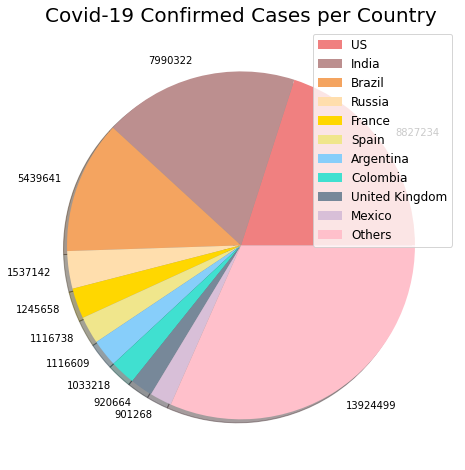

In [139]:
pie_charts(unique_countries_visual, confirmed_cases_visual, 'Covid-19 Confirmed Cases per Country')

In [140]:
# Plotting India's data with regional data using a pie chart
def pie_country_with_regions(country_name, title):
    pie_regions = list(data_latest[data_latest['Country_Region']==country_name]['Province_State'].unique())
    confirmed_cases = []
    no_cases = [] 
    for i in pie_regions:
        cases = data_latest[data_latest['Province_State']==i]['Confirmed'].sum()
        if cases > 0:
            confirmed_cases.append(cases)
        else:
            no_cases.append(i)

    # remove areas with no confirmed cases
    for i in no_cases:
        pie_regions.remove(i)

    # only show the top 10 states
    pie_regions = [k for k, v in sorted(zip(pie_regions, confirmed_cases), key=operator.itemgetter(1), reverse=True)]

    for i in range(len(pie_regions)):
        confirmed_cases[i] = data_latest[data_latest['Province_State']==pie_regions[i]]['Confirmed'].sum()  
    
    # additional province/state will be considered "others"
    
    if(len(pie_regions)>10):
        pie_regions_10 = pie_regions[:10]
        pie_regions_10.append('Others')
        confirmed_cases_10 = confirmed_cases[:10]
        confirmed_cases_10.append(np.sum(confirmed_cases[10:]))
        pie_charts(pie_regions_10,confirmed_cases_10, title)
    else:
        pie_charts(pie_regions,confirmed_cases, title)

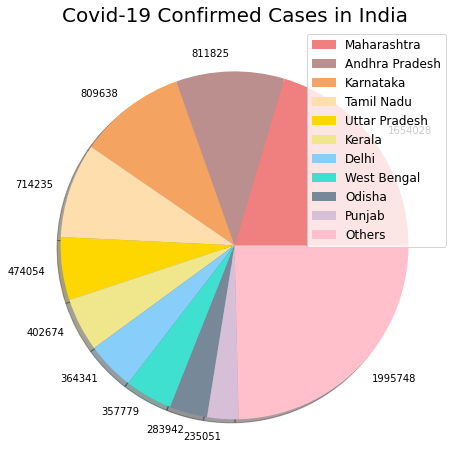

In [141]:
pie_country_with_regions('India', 'Covid-19 Confirmed Cases in India')

# World and India's cases 

In [142]:
# GET ALL THE DATES OF THE OUTBREAK
confirmed = confirmed_cases.loc[:, cols[4]:cols[-1]]
deaths = death_cases.loc[:, cols[4]:cols[-1]]
recoveries = recovered_cases.loc[:, cols[4]:cols[-1]]
dates = confirmed.keys()

world_cases = []
total_deaths = [] 
mortality_rate = []
recovery_rate = [] 
total_recovered = [] 
total_active = [] 

for i in dates:
    sum_confirmed = confirmed[i].sum()
    death_sum = deaths[i].sum()
    recovered_sum = recoveries[i].sum()
    
    # confirmed, deaths, recovered, and active
    world_cases.append(sum_confirmed)
    total_deaths.append(death_sum)
    total_recovered.append(recovered_sum)
    total_active.append(sum_confirmed-death_sum-recovered_sum)
    
    # calculate rates
    mortality_rate.append(death_sum/sum_confirmed)
    recovery_rate.append(recovered_sum/sum_confirmed)



#For India
india_confirmed = confirmed_cases.loc[confirmed_cases['Country/Region'] == 'India']
india_deaths = death_cases.loc[death_cases['Country/Region'] == 'India']
india_recovered = recovered_cases.loc[recovered_cases['Country/Region'] == 'India']
india_active=[]
mortality_rate_india = []
recovery_rate_india = []


confirmed_india = india_confirmed.loc[:, cols[4]:cols[-1]]
deaths_india = india_deaths.loc[:, cols[4]:cols[-1]]
recoveries_india = india_recovered.loc[:, cols[4]:cols[-1]]

confirmed_india = confirmed_india.values.tolist()
confirmed_india = confirmed_india[0]
deaths_india = deaths_india.values.tolist()
deaths_india = deaths_india[0]
recoveries_india = recoveries_india.values.tolist()
recoveries_india = recoveries_india[0]


l = len(confirmed_india)


for i in range(0,l):
 india_active.append(confirmed_india[i] -deaths_india[i] -recoveries_india[i])
 if (confirmed_india[i] != 0):
    mortality_rate_india.append(deaths_india[i]/confirmed_india[i])
    recovery_rate_india.append(recoveries_india[i]/confirmed_india[i])
 else:
   mortality_rate_india.append(0)
   recovery_rate_india.append(0)

# Daily increases and Moving averages

In [143]:
def daily_increases_(data):
    d = [] 
    for i in range(len(data)):
        if i == 0:
            d.append(data[0])
        else:
            d.append(data[i]-data[i-1])
    return d 

def  moving_averages_(data, window_size):
    moving_averages_ = []
    for i in range(len(data)):
        if i + window_size < len(data):
             moving_averages_.append(np.mean(data[i:i+window_size]))
        else:
             moving_averages_.append(np.mean(data[i:len(data)]))
    return  moving_averages_

# window size
window = 7

# confirmed cases
world_daily_increase = daily_increases_(world_cases)
world_confirmed_avg=  moving_averages_(world_cases, window)
world_daily_increase_avg =  moving_averages_(world_daily_increase, window)

# deaths
world_daily_death = daily_increases_(total_deaths)
world_death_avg =  moving_averages_(total_deaths, window)
world_daily_death_avg =  moving_averages_(world_daily_death, window)


# recoveries
world_daily_recovery = daily_increases_(total_recovered)
world_recovery_avg =  moving_averages_(total_recovered, window)
world_daily_recovery_avg =  moving_averages_(world_daily_recovery, window)


# active 
world_active_avg =  moving_averages_(total_active, window)

In [144]:
#INDIA

# confirmed cases
india_daily_increase = daily_increases_(confirmed_india)
india_confirmed_avg=  moving_averages_(confirmed_india, window)
india_daily_increase_avg =  moving_averages_(india_daily_increase, window)

# deaths
india_daily_death = daily_increases_(deaths_india)
india_death_avg =  moving_averages_(deaths_india, window)
india_daily_death_avg =  moving_averages_(india_daily_death, window)


# recoveries
india_daily_recovery = daily_increases_(recoveries_india)
india_recovery_avg =  moving_averages_(recoveries_india, window)
india_daily_recovery_avg =  moving_averages_(india_daily_recovery, window)


# active 
india_active_avg =  moving_averages_(india_active, window)

In [145]:
days_since_22_Jan = np.array([i for i in range(len(dates))]).reshape(-1, 1)
world_cases = np.array(world_cases).reshape(-1, 1)
total_deaths = np.array(total_deaths).reshape(-1, 1)
total_recovered = np.array(total_recovered).reshape(-1, 1)
dates = confirmed.keys()

Future forcasting

In [146]:
days_in_future = 10
future_forcast = np.array([i for i in range(len(dates)+days_in_future)]).reshape(-1, 1)
dates_adjusted = future_forcast[:-10]

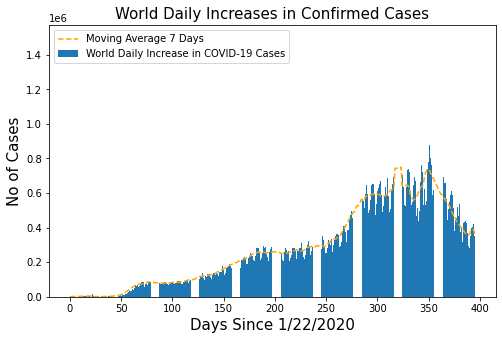

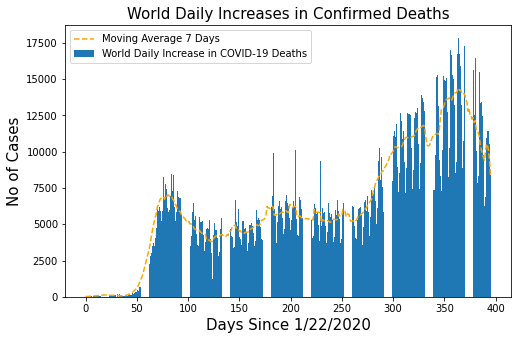

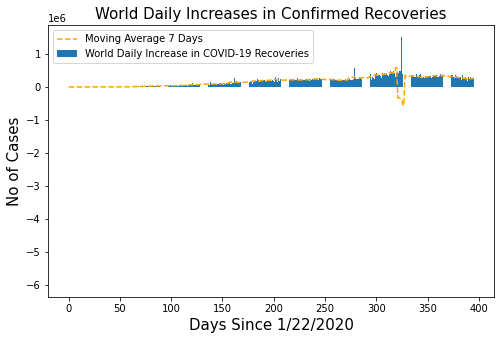

In [192]:
dates_adjusted = dates_adjusted.reshape(1, -1)[0]

plt.figure(figsize=(8, 5))
plt.bar(dates_adjusted, world_daily_increase)
plt.plot(dates_adjusted, world_daily_increase_avg, color='orange', linestyle='dashed')
plt.title('World Daily Increases in Confirmed Cases', size=15)
plt.xlabel('Days Since 1/22/2020', size=15)
plt.ylabel('No of Cases', size=15)
plt.legend(['Moving Average {} Days'.format(window), 'World Daily Increase in COVID-19 Cases'], prop={'size': 10})
plt.xticks(size=10)
plt.yticks(size=10)
plt.show()

plt.figure(figsize=(8, 5))
plt.bar(dates_adjusted, world_daily_death)
plt.plot(dates_adjusted, world_daily_death_avg, color='orange', linestyle='dashed')
plt.title('World Daily Increases in Confirmed Deaths', size=15)
plt.xlabel('Days Since 1/22/2020', size=15)
plt.ylabel('No of Cases', size=15)
plt.legend(['Moving Average {} Days'.format(window), 'World Daily Increase in COVID-19 Deaths'], prop={'size': 10})
plt.xticks(size=10)
plt.yticks(size=10)
plt.show()

plt.figure(figsize=(8, 5))
plt.bar(dates_adjusted, world_daily_recovery)
plt.plot(dates_adjusted, world_daily_recovery_avg, color='orange', linestyle='dashed')
plt.title('World Daily Increases in Confirmed Recoveries', size=15)
plt.xlabel('Days Since 1/22/2020', size=15)
plt.ylabel('No of Cases', size=15)
plt.legend(['Moving Average {} Days'.format(window), 'World Daily Increase in COVID-19 Recoveries'], prop={'size': 10})
plt.xticks(size=10)
plt.yticks(size=10)
plt.show()

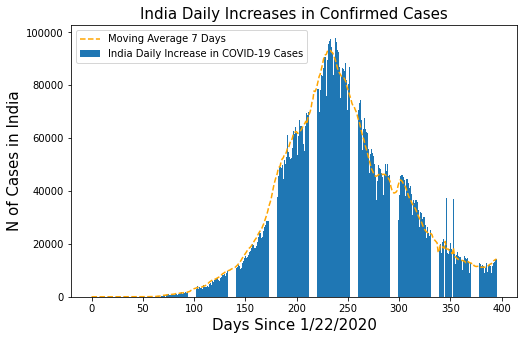

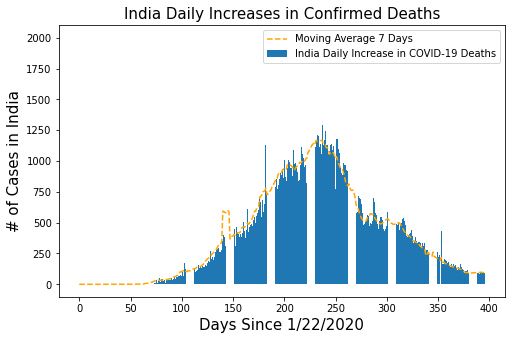

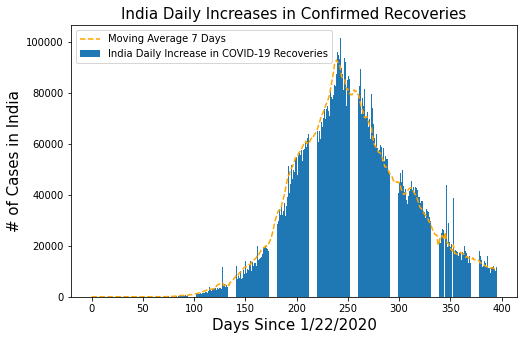

In [148]:
# For India

plt.figure(figsize=(8, 5))
plt.bar(dates_adjusted, india_daily_increase)
plt.plot(dates_adjusted, india_daily_increase_avg, color='orange', linestyle='dashed')
plt.title('India Daily Increases in Confirmed Cases', size=15)
plt.xlabel('Days Since 1/22/2020', size=15)
plt.ylabel('N of Cases in India', size=15)
plt.legend(['Moving Average {} Days'.format(window), 'India Daily Increase in COVID-19 Cases'], prop={'size': 10})
plt.xticks(size=10)
plt.yticks(size=10)
plt.show()

plt.figure(figsize=(8, 5))
plt.bar(dates_adjusted, india_daily_death)
plt.plot(dates_adjusted, india_daily_death_avg, color='orange', linestyle='dashed')
plt.title('India Daily Increases in Confirmed Deaths', size=15)
plt.xlabel('Days Since 1/22/2020', size=15)
plt.ylabel('# of Cases in India', size=15)
plt.legend(['Moving Average {} Days'.format(window), 'India Daily Increase in COVID-19 Deaths'], prop={'size': 10})
plt.xticks(size=10)
plt.yticks(size=10)
plt.show()

plt.figure(figsize=(8, 5))
plt.bar(dates_adjusted, india_daily_recovery)
plt.plot(dates_adjusted, india_daily_recovery_avg, color='orange', linestyle='dashed')
plt.title('India Daily Increases in Confirmed Recoveries', size=15)
plt.xlabel('Days Since 1/22/2020', size=15)
plt.ylabel('# of Cases in India', size=15)
plt.legend(['Moving Average {} Days'.format(window), 'India Daily Increase in COVID-19 Recoveries'], prop={'size': 10})
plt.xticks(size=10)
plt.yticks(size=10)
plt.show()

Convert integer into datetime for better visualization

In [149]:
start_date = '1/22/2020'
start_date__ = datetime.datetime.strptime(start_date, '%m/%d/%Y')
future_forcast_dates = []
for i in range(len(future_forcast)):
    future_forcast_dates.append((start_date__ + datetime.timedelta(days=i)).strftime('%m/%d/%Y'))

#Training sets

In [150]:
# slightly modify the data to fit the model better (regression models cannot pick the pattern)
world_x_train_confirmed, world_x_test_confirmed, world_y_train_confirmed, world_y_test_confirmed = train_test_split(days_since_22_Jan[50:], world_cases[50:], test_size=0.12, shuffle=False) 

#FOR INDIA
india_x_train_confirmed, india_x_test_confirmed, india_y_train_confirmed, india_y_test_confirmed = train_test_split(days_since_22_Jan[50:], confirmed_india[50:], test_size=0.12, shuffle=False) 

In [151]:
def plot_model_predictions(x, y, pred, algo_name, color):
    plt.figure(figsize=(8, 5))
    plt.plot(x, y)
    plt.plot(future_forcast, pred, linestyle='dashed', color=color)
    plt.title('Coronavirus Cases Over Time', size=15)
    plt.xlabel('Days Since 1/22/2020', size=15)
    plt.ylabel('No of Cases', size=15)
    plt.legend(['Confirmed Cases', algo_name], prop={'size': 10})
    plt.xticks(size=10)
    plt.yticks(size=10)
    plt.show()

# PREDICTION USING DIFFERENT ML MODELS

#SVM

In [152]:
# svm_confirmed = svm_search.best_estimator_
svm_confirmed = SVR(shrinking=True, kernel='poly',gamma=0.01, epsilon=1,degree=3, C=0.1)
svm_confirmed.fit(world_x_train_confirmed, world_y_train_confirmed)
svm_pred = svm_confirmed.predict(future_forcast)

#FOR INDIA
india_svm_confirmed = SVR(shrinking=True, kernel='poly',gamma=0.01, epsilon=1,degree=3, C=0.1)
india_svm_confirmed.fit(india_x_train_confirmed, india_y_train_confirmed)
india_svm_pred = india_svm_confirmed.predict(future_forcast)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



In [153]:
# Worldwide
svm_test_pred = svm_confirmed.predict(world_x_test_confirmed)
print('MAE:', mean_absolute_error(world_y_test_confirmed,svm_test_pred))
print('MSE:',mean_squared_error(world_y_test_confirmed,svm_test_pred))

MAE: 5808943.897233386
MSE: 52284241418229.35


In [154]:
# FOR INDIA
india_svm_test_pred = india_svm_confirmed.predict(india_x_test_confirmed)
print('MAE for India:', mean_absolute_error(india_svm_test_pred, india_y_test_confirmed))
print('MSE for India:',mean_squared_error(india_svm_test_pred, india_y_test_confirmed))


MAE for India: 5797086.492034081
MSE for India: 35778837517852.94


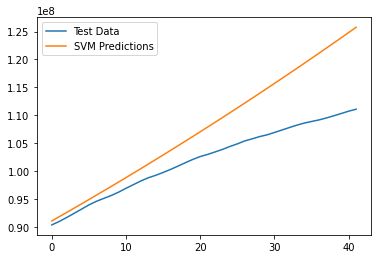

In [155]:
plt.plot(world_y_test_confirmed)
plt.plot(svm_test_pred)
plt.legend(['Test Data', 'SVM Predictions'])

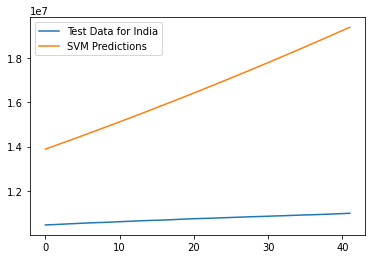

In [156]:
plt.plot(india_y_test_confirmed)
plt.plot(india_svm_test_pred)
plt.legend(['Test Data for India', 'SVM Predictions'])

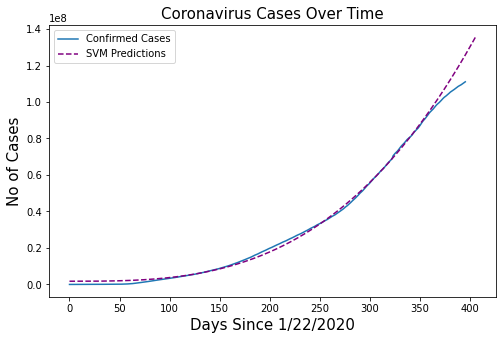

In [157]:
plot_model_predictions(dates_adjusted, world_cases, svm_pred, 'SVM Predictions', 'purple')


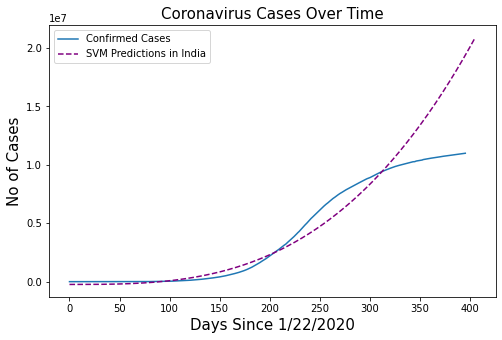

In [158]:
plot_model_predictions(dates_adjusted, confirmed_india, india_svm_pred, 'SVM Predictions in India', 'purple')

In [159]:
# Future predictions using SVM 
svm_df = pd.DataFrame({'Date': future_forcast_dates[-10:], '<SVM Prediction> Confirmed Cases Worldwide': np.round(svm_pred[-10:])})
svm_df.style.background_gradient(cmap='Greens')

,Date,Confirmed Cases Worldwide
0,02/21/2021,126722704.000000
1,02/22/2021,127671769.000000
2,02/23/2021,128625626.000000
3,02/24/2021,129584289.000000
4,02/25/2021,130547769.000000
5,02/26/2021,131516079.000000
6,02/27/2021,132489230.000000
7,02/28/2021,133467235.000000
8,03/01/2021,134450106.000000
9,03/02/2021,135437854.000000


In [160]:
# Future predictions using SVM 
india_svm_df = pd.DataFrame({'Date': future_forcast_dates[-10:], '<SVM Prediction> Confirmed Cases in India': np.round(india_svm_pred[-10:])})
india_svm_df.style.background_gradient(cmap='Greens')

,Date,Confirmed Cases in India
0,02/21/2021,19533365.000000
1,02/22/2021,19683528.000000
2,02/23/2021,19834449.000000
3,02/24/2021,19986131.000000
4,02/25/2021,20138575.000000
5,02/26/2021,20291783.000000
6,02/27/2021,20445756.000000
7,02/28/2021,20600498.000000
8,03/01/2021,20756010.000000
9,03/02/2021,20912294.000000


#POLYNOMIAL REGRESSION

In [161]:
# transform our data for polynomial regression
_poly_ = PolynomialFeatures(degree=5)
poly__x_train_confirmed = _poly_.fit_transform(world_x_train_confirmed)
poly__x_test_confirmed = _poly_.fit_transform(world_x_test_confirmed)
poly_future_forcast = _poly_.fit_transform(future_forcast)

# For India
india_poly = PolynomialFeatures(degree=5)
india_poly__x_train_confirmed = india_poly.fit_transform(india_x_train_confirmed)
india_poly_x_test_confirmed = india_poly.fit_transform(india_x_test_confirmed)
india_poly_future_forcast = india_poly.fit_transform(future_forcast)


In [162]:
# polynomial regression
linear_model = LinearRegression(normalize=True, fit_intercept=False)
linear_model.fit(poly__x_train_confirmed, world_y_train_confirmed)
test_linear_pred = linear_model.predict(poly__x_test_confirmed)
linear_pred = linear_model.predict(poly_future_forcast)
print('MAE:', mean_absolute_error(test_linear_pred, world_y_test_confirmed))
print('MSE:',mean_squared_error(test_linear_pred, world_y_test_confirmed))


MAE: 7745782.010227469
MSE: 86560977024694.66


In [163]:
# FOR INDIA
india_linear_model = LinearRegression(normalize=True, fit_intercept=False)
india_linear_model.fit(india_poly__x_train_confirmed, india_y_train_confirmed)
india_test_linear_pred = india_linear_model.predict(india_poly_x_test_confirmed)
india_linear_pred = india_linear_model.predict(india_poly_future_forcast)
print('MAE for India:', mean_absolute_error(india_test_linear_pred, india_y_test_confirmed))
print('MSE for India:',mean_squared_error(india_test_linear_pred,india_y_test_confirmed))


MAE for India: 651995.6339469495
MSE for India: 503825010014.64435


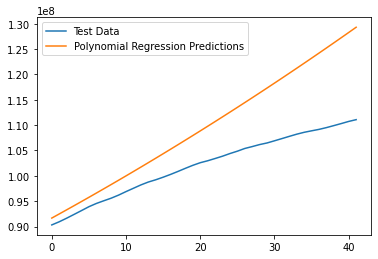

In [164]:
plt.plot(world_y_test_confirmed)
plt.plot(test_linear_pred)
plt.legend(['Test Data', 'Polynomial Regression Predictions'])

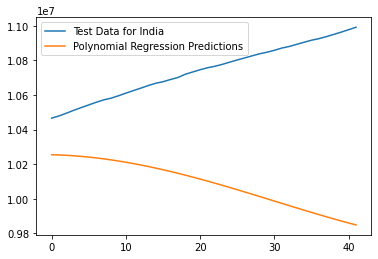

In [165]:
plt.plot(india_y_test_confirmed)
plt.plot(india_test_linear_pred)
plt.legend(['Test Data for India ', 'Polynomial Regression Predictions'])

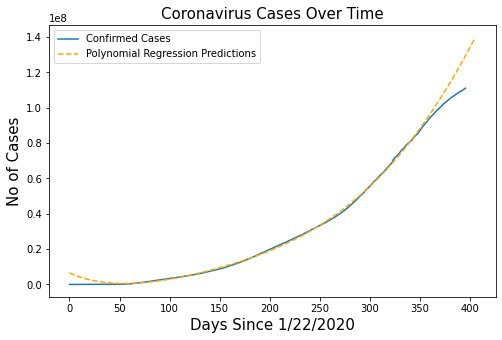

In [166]:
plot_model_predictions(dates_adjusted, world_cases, linear_pred, 'Polynomial Regression Predictions', 'orange')

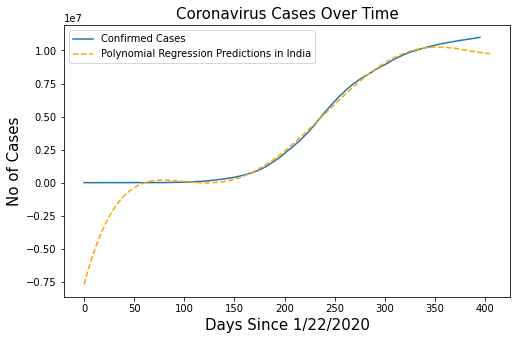

In [167]:
plot_model_predictions(dates_adjusted, confirmed_india, india_linear_pred, 'Polynomial Regression Predictions in India', 'orange')

In [168]:
# Future predictions using polynomial regression
linear_pred = linear_pred.reshape(1,-1)[0]
linear_df = pd.DataFrame({'Date': future_forcast_dates[-10:], '<Polynomial Prediction> Confirmed Cases Worldwide': np.round(linear_pred[-10:])})
linear_df.style.background_gradient(cmap='Greens')

,Date,Confirmed Cases Worldwide
0,02/21/2021,130330204.000000
1,02/22/2021,131370724.000000
2,02/23/2021,132416838.000000
3,02/24/2021,133468543.000000
4,02/25/2021,134525833.000000
5,02/26/2021,135588704.000000
6,02/27/2021,136657150.000000
7,02/28/2021,137731166.000000
8,03/01/2021,138810745.000000
9,03/02/2021,139895881.000000


In [169]:
india_linear_pred = india_linear_pred.reshape(1,-1)[0]
india_linear_df = pd.DataFrame({'Date': future_forcast_dates[-10:], '<Polynomial Prediction> Confirmed Cases in India': np.round(india_linear_pred[-10:])})
india_linear_df.style.background_gradient(cmap='Greens')

,Date,Confirmed Cases in India
0,02/21/2021,9838502.000000
1,02/22/2021,9828102.000000
2,02/23/2021,9818200.000000
3,02/24/2021,9808838.000000
4,02/25/2021,9800062.000000
5,02/26/2021,9791916.000000
6,02/27/2021,9784447.000000
7,02/28/2021,9777700.000000
8,03/01/2021,9771724.000000
9,03/02/2021,9766567.000000


# BAYESIAN RIDGE POLYNOMIAL REGRESSION

In [170]:
bayesian_poly = PolynomialFeatures(degree=5)
bayesian_poly_x_train_confirmed = bayesian_poly.fit_transform(world_x_train_confirmed)
bayesian_poly_x_test_confirmed = bayesian_poly.fit_transform(world_x_test_confirmed)
bayesian_poly_future_forcast = bayesian_poly.fit_transform(future_forcast)

india_bayesian_poly = PolynomialFeatures(degree=5)
india_bayesian_poly_x_train_confirmed = india_bayesian_poly.fit_transform(india_x_train_confirmed)
india_bayesian_poly_x_test_confirmed = india_bayesian_poly.fit_transform(india_x_test_confirmed)
india_bayesian_poly_future_forcast = india_bayesian_poly.fit_transform(future_forcast)

In [171]:
bayesian=BayesianRidge()

In [173]:
# worldwide
bayesian.fit(bayesian_poly_x_train_confirmed, world_y_train_confirmed)
bayesian_world_pred=bayesian.predict(bayesian_poly_x_test_confirmed)
bayesian_pred_world=bayesian.predict(bayesian_poly_future_forcast)
print('MAE:', mean_absolute_error(bayesian_world_pred, world_y_test_confirmed))
print('MSE:',mean_squared_error(bayesian_world_pred, world_y_test_confirmed))

MAE: 10550580.723446772
MSE: 157590417494258.47


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



In [174]:
#For India
bayesian.fit(india_bayesian_poly_x_train_confirmed, india_y_train_confirmed)
bayesian_india_pred =bayesian.predict(india_bayesian_poly_x_test_confirmed)
bayesian_pred_india=bayesian.predict(india_bayesian_poly_future_forcast)
print('MAE for India:', mean_absolute_error(bayesian_india_pred, india_y_test_confirmed))
print('MSE for India:',mean_squared_error(bayesian_india_pred, india_y_test_confirmed))

MAE for India: 3623301.940847633
MSE for India: 17259602071425.217


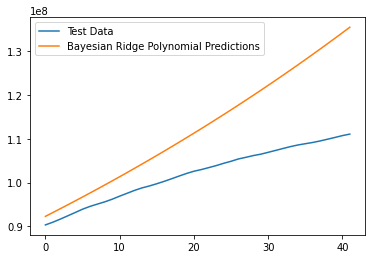

In [175]:
plt.plot(world_y_test_confirmed)
plt.plot(bayesian_world_pred)
plt.legend(['Test Data', 'Bayesian Ridge Polynomial Predictions'])

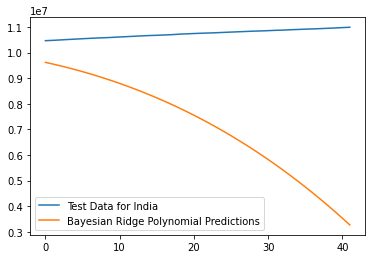

In [176]:
plt.plot(india_y_test_confirmed)
plt.plot(bayesian_india_pred)
plt.legend(['Test Data for India', 'Bayesian Ridge Polynomial Predictions'])

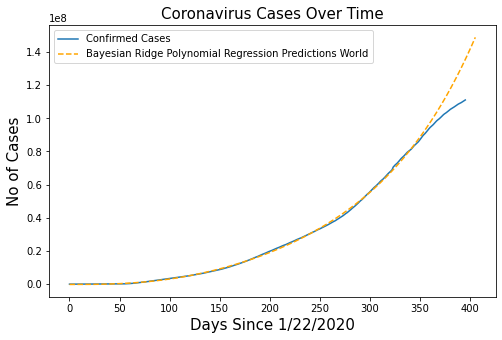

In [215]:
plot_model_predictions(dates_adjusted, world_cases, bayesian_pred_world, 'Bayesian Ridge Polynomial Regression Predictions World', 'orange')

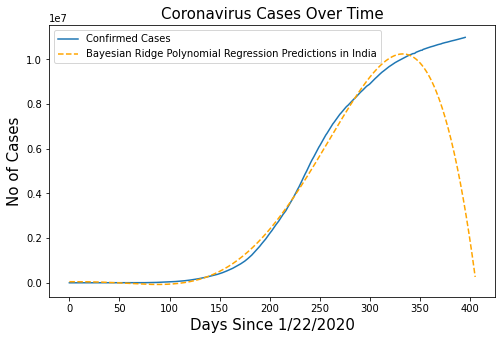

In [216]:
plot_model_predictions(dates_adjusted, confirmed_india, bayesian_pred_india, 'Bayesian Ridge Polynomial Regression Predictions in India', 'orange')

In [179]:
# Future predictions using bayesian -WORLD
bayesian_world_future_pred = pd.DataFrame({'Date': future_forcast_dates[-10:], '<Bayesian Classifier Prediction> Confirmed Cases Worldwide': np.round(bayesian_pred_world [-10:])})
bayesian_world_future_pred.style.background_gradient(cmap='Greens')

,Date,Confirmed Cases Worldwide
0,02/21/2021,136770893.000000
1,02/22/2021,138060690.000000
2,02/23/2021,139362760.000000
3,02/24/2021,140677218.000000
4,02/25/2021,142004180.000000
5,02/26/2021,143343764.000000
6,02/27/2021,144696086.000000
7,02/28/2021,146061266.000000
8,03/01/2021,147439422.000000
9,03/02/2021,148830675.000000


In [180]:
# Future predictions using bayesian- INDIA
bayesian_india_future_pred = pd.DataFrame({'Date': future_forcast_dates[-10:], '<Bayesian Classifier Prediction> Confirmed Cases In India': np.round(bayesian_pred_india [-10:])})
bayesian_india_future_pred.style.background_gradient(cmap='Greens')

,Date,Confirmed Cases In India
0,02/21/2021,2995520.000000
1,02/22/2021,2719188.000000
2,02/23/2021,2436193.000000
3,02/24/2021,2146449.000000
4,02/25/2021,1849872.000000
5,02/26/2021,1546374.000000
6,02/27/2021,1235870.000000
7,02/28/2021,918271.000000
8,03/01/2021,593490.000000
9,03/02/2021,261437.000000


# NEURAL NETWORKS

In [182]:
def train_test(neural_network, X, Y, epochs=5000, training_percent_size = 0.8):
    # This function takes a dataset, splits it into training and testing sets
    # according to training_percent_size, trains a plain LSTM model on it
    # launches preditions on datasets, and plots the result.
    N = len(X)
    # Extract training and testing samples and convert in numpy arrays
    n_training = int(N*training_percent_size)
    X_TRAINING, Y_TRAINING = np.array(X[:n_training]), np.array(Y[:n_training])
    X_TESTING, Y_TESTING = np.array(X[n_training:]), np.array(Y[n_training:])
    # neural_network.fit expect a (samples, input-steps, output-steps) shaped X array
    X_TRAINING = X_TRAINING.reshape((X_TRAINING.shape[0], X_TRAINING.shape[1], 1))
    X_TESTING = X_TESTING.reshape((X_TESTING.shape[0], X_TESTING.shape[1], 1))
    # Training: shuffle=False prevents data shuffling, order is important! 
    for i in range(epochs):
        neural_network.fit(X_TRAINING, Y_TRAINING, epochs = 1, verbose = 0, shuffle = False)
        neural_network.reset_states()
    Y_PREDICTED = []    # we list predictions in this array
    for x in X_TESTING:
        x = x.reshape((1, 1, 1))
        y = neural_network.predict(x, verbose = 0)
        Y_PREDICTED.append(y[0][0])
    #Plot data in read and predictions in blue
    #plt.plot(Y, 'r')
    #plt.plot(range(n_training, N), Y_PREDICTED, 'b')
    #plt.show()
    # Test loss
    #print("Loss =", np.linalg.norm(Y_TESTING - np.array(Y_PREDICTED))**2/len(Y_TESTING))
    # The curve with prediction instead of testing values is returned
    return Y_TRAINING, Y_TESTING ,Y_PREDICTED
 
# Set up the network with one layer of 10 nodes
nn = Sequential()
nn.add(LSTM(10, activation = "relu", input_shape = (1, 1), return_sequences=True))
nn.add(LSTM(10, activation = "relu"))
nn.add(Dense(1))   # the layer has a 1-dimensional output (a number!)
nn.compile(loss="mean_squared_error", optimizer="adam")

#for world
y_training, y_testing, y_predicted = train_test(nn,world_x_train_confirmed,world_y_train_confirmed)

#for india
india_y_training, india_y_testing, india_y_predicted = train_test(nn,india_x_train_confirmed, india_y_train_confirmed)

In [183]:
print('MAE:', mean_absolute_error(y_predicted,y_testing))
print('MSE:',mean_squared_error(y_predicted,y_testing))

MAE: 21597946.672131147
MSE: 534336863189910.4


In [184]:
print('MAE:', mean_absolute_error(india_y_predicted,india_y_testing))
print('MSE:',mean_squared_error(india_y_predicted,india_y_testing))

MAE: 261222.02459016393
MSE: 98079114969.15164


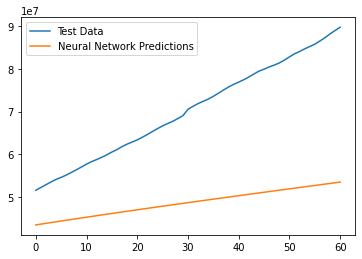

In [185]:
plt.plot(y_testing)
plt.plot(y_predicted)
plt.legend(['Test Data', 'Neural Network Predictions'])

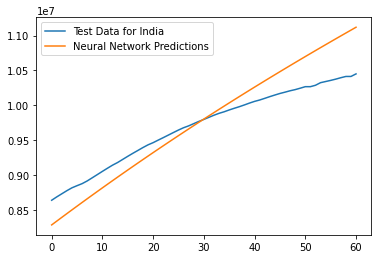

In [186]:
plt.plot(india_y_testing)
plt.plot(india_y_predicted)
plt.legend(['Test Data for India', 'Neural Network Predictions'])

In [187]:
y_pred_df = pd.DataFrame({'Date': future_forcast_dates[-10:], 'Neural Network # of Confirmed Cases in Worldwide': np.round(y_predicted[-10:])})
y_pred_df.style.background_gradient(cmap='Greens')

,Date,Neural Network # of Confirmed Cases in Worldwide
0,02/21/2021,52101984.000000
1,02/22/2021,52260324.000000
2,02/23/2021,52418452.000000
3,02/24/2021,52576380.000000
4,02/25/2021,52734104.000000
5,02/26/2021,52891640.000000
6,02/27/2021,53048980.000000
7,02/28/2021,53206140.000000
8,03/01/2021,53363132.000000
9,03/02/2021,53519952.000000


In [188]:
india_y_pred_df = pd.DataFrame({'Date': future_forcast_dates[-10:], 'Neural Network # of Confirmed Cases in India': np.round(india_y_predicted[-10:])})
india_y_pred_df.style.background_gradient(cmap='Greens')

,Date,Neural Network # of Confirmed Cases in India
0,02/21/2021,10741975.000000
1,02/22/2021,10784651.000000
2,02/23/2021,10827153.000000
3,02/24/2021,10869484.000000
4,02/25/2021,10911646.000000
5,02/26/2021,10953641.000000
6,02/27/2021,10995474.000000
7,02/28/2021,11037145.000000
8,03/01/2021,11078653.000000
9,03/02/2021,11120008.000000


# SIR MODEL

In [195]:
from datetime import timedelta, datetime
START_DATE = { 'India':'1/30/20'}
class Learner(object):
      def __init__(self, country, loss, start_date = '1/22/20', predict_range = 150, s_0 = 100000, i_0 = 2, r_0 = 10):
        self.country = country
        self.loss = loss
        self.start_date = start_date
        self.predict_range = predict_range
        self.s_0 = s_0
        self.i_0 = i_0
        self.r_0 = r_0
        
      def load_confirmed(self, country):
        df = confirmed_cases
        df = df.drop(['Province/State'], axis = 1)
        country_df = df[df['Country/Region'] == country]
        return country_df.iloc[0].loc[self.start_date:]

      def load_recovered(self, country):
        df = recovered_cases
        df = df.drop(['Province/State'], axis = 1)
        country_df = df[df['Country/Region'] == country]
        return country_df.iloc[0].loc[self.start_date:]
      
      def load_death(self, country):
        df = death_cases
        df = df.drop(['Province/State'], axis = 1)
        country_df = df[df['Country/Region'] == country]
        return country_df.iloc[0].loc[self.start_date:]

      def extend_index(self, index, new_size):
        values = index.values
        current = datetime.strptime(index[-1],'%m/%d/%y')
        while len(values)< new_size:
          current = current + timedelta(days = 1)
          values = np.append(values, datetime.strftime(current, '%m/%d/%y'))
        return values
      def predict(self, beta, gamma, data, recovered, death, country, s_0, i_0, r_0):
        new_index = self.extend_index(data.index, self.predict_range)
        size = len(new_index)
        def SIR(t,y):
          S = y[0]
          I = y[1]
          R = y[2]
          return [-beta*S*I, beta*S*I - gamma*I, gamma*I]
        extended_actual = np.concatenate((data.values, [None]*(size-len(data.values))))
        extended_recovered = np.concatenate((recovered.values, [None]*(size-len(recovered.values))))
        extended_death = np.concatenate((death.values, [None]*(size-len(death.values))))
        return new_index, extended_actual, extended_recovered,  extended_death, solve_ivp(SIR, [0, size], [s_0, i_0, r_0], t_eval = np.arange(0, size, 1))

      def train(self):
        recovered = self.load_recovered(self.country)
        death = self.load_death(self.country)
        data = (self.load_confirmed(self.country) - recovered - death)

        optimal = minimize(loss, [0.001, 0.001], args = (data, recovered, self.s_0, self.i_0, self.r_0), method = 'L-BFGS-B', bounds = [(0.00000001, 0.4),(0.00000001, 0.4) ])
        print(optimal)
        
        beta, gamma = optimal.x
        new_index, extended_actual, extended_recovered,  extended_death, prediction = self.predict(beta, gamma, data, recovered, death, self.country, self.s_0, self.i_0, self.r_0)

        df = pd.DataFrame({'Infected data' : extended_actual, 'Recovered data' : extended_recovered, 'Death data' : extended_death, 'Susceptible' : prediction.y[0], 'Infected' : prediction.y[1],'Recovered' : prediction.y[2]}, index = new_index)

        #save results to csv
        df.to_csv(f"{self.country}.csv")
        fig, ax = plt.subplots(figsize = (10, 10))
        ax.set_title(self.country)
        df.plot(ax= ax)
        print(f"country = {self.country}, beta = {beta: .8f},  gamma = {gamma: .8f}, r_0: {(beta/gamma) : .8f}")
        fig.savefig(f"{self.country}.png")
        return df, fig


In [221]:
def loss(point, data, recovered, s_0, i_0, r_0):
  size = len(data)
  beta, gamma = point
  def SIR(t, y):
    S = y[0]
    I = y[1]
    R = y[2]
    return [-beta*S*I, beta*S*I - gamma*I, gamma*I]
  solution = solve_ivp(SIR, [0, size], [s_0, i_0, r_0], t_eval = np.arange(0, size, 1), vectorized = True)
  l1 = np.sqrt(np.mean(solution.y[1]-data)**2)
  l2 = np.sqrt(np.mean(solution.y[1]-recovered)**2)
  alpha = 0.1
  return alpha*l1 + (1 - alpha )*l2

      fun: 3292140.7737652087
 hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>
      jac: array([2.79396772e-01, 1.97249384e+07])
  message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 57
      nit: 3
   status: 0
  success: True
        x: array([4.06031039e-04, 1.00000000e-08])
country = India, beta =  0.00040603,  gamma =  0.00000001, r_0:  40603.10390708


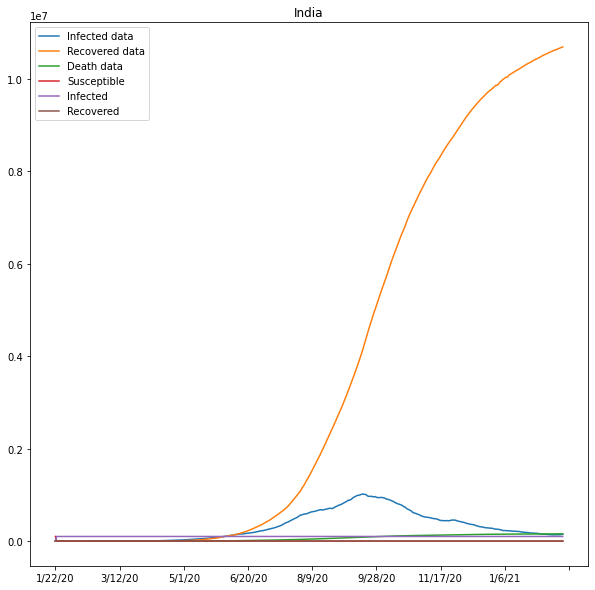

In [222]:
india_learner = Learner(country = "India", loss = loss, i_0 = 3)
india_sir, india_sir_fig = india_learner.train()

In [198]:
def plot_sir_prediction(title, df_sir, remove_series = [], yaxis_type = " ", yaxis_title = " "):
  fig = go.Figure()
  title = title
  labels = ['Infected data', 'Recovered data', 'Death data', 'Susceptible', 'Infected', 'Recovered']
  colors = [color_arr[0], color_arr[8], color_arr[2], color_arr[3], color_arr[7], color_arr[16]]
  line_size = [2, 2, 2, 2, 2, 2]

  for index, data_series in enumerate(labels):
    if data_series not in remove_series:
      fig.add_trace(go.Scatter(x=df_sir.index, y= df_sir[data_series], name = labels[index], line = dict(color = colors[index], width = line_size[index]), connectgaps = True))
  xaxis = dict(title = "Date", showline = True, showgrid = True, showticklabels = True, linecolor = 'rgb(204, 204, 204)', linewidth = 2, ticks = 'outside', tickangle = 280, tickfont = dict(family = 'Arial', size = 12, color = 'rgb(82, 82, 82)',),)
  yaxis = dict(title = "Count Count", showline = True, showgrid = True, showticklabels = True, linecolor = 'rgb(204, 204, 204)', linewidth = 2,)
  
  if yaxis_type != " ":
     yaxis['type'] = yaxis_type
  if yaxis_title != " ":
    yaxis['title'] = yaxis_title
  
  # Updating the layout
  fig.update_layout(xaxis = xaxis, yaxis = yaxis, autosize = False, margin = dict(autoexpand = True, l = 10, r = 10, t = 10,), showlegend = True)

  # base annottions for any graph
  annotations = []
  # Title
  annotations.append(dict(xref='paper', yref = 'paper', x= 0.0, y = 1.05, xanchor = 'left', yanchor = 'bottom', text = title, font = dict(family = 'Arial', size = 16, color= 'rgb(37,37,37)'),showarrow = False))
  
  # updating the layout
  fig.update_layout(annotations = annotations)

  return fig

In [223]:
fig_ = plot_sir_prediction(title = "SIR Model -- Covid-19 Transmission -- Prediction -- India", df_sir = india_sir)
fig_.show()

# RANDOM FOREST

In [224]:
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
rf.fit(world_x_train_confirmed,world_y_train_confirmed)
y_pred_confirmed=rf.predict(world_x_test_confirmed)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



In [225]:
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
rf.fit(india_x_train_confirmed,india_y_train_confirmed)
india_y_pred_confirmed=rf.predict(india_x_test_confirmed)

In [226]:
print('MAE:', mean_absolute_error(y_pred_confirmed, world_y_test_confirmed))
print('MSE:',mean_squared_error(y_pred_confirmed, world_y_test_confirmed))

MAE: 12666553.895571422
MSE: 197707965851321.47


In [227]:
print('MAE:', mean_absolute_error(india_y_pred_confirmed, india_y_test_confirmed))
print('MSE:',mean_squared_error(india_y_pred_confirmed, india_y_test_confirmed))

MAE: 303859.76300000027
MSE: 115419314450.51155


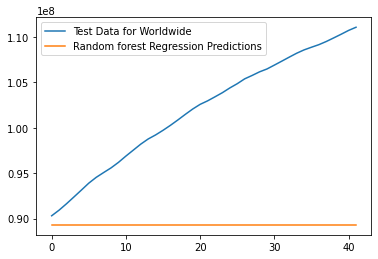

In [228]:
plt.plot(world_y_test_confirmed)
plt.plot(y_pred_confirmed)
plt.legend(['Test Data for Worldwide', 'Random forest Regression Predictions'])

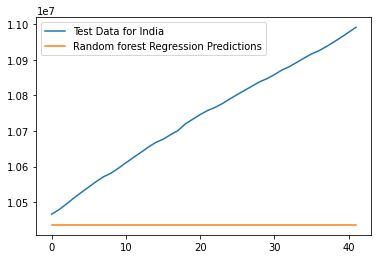

In [229]:
plt.plot(india_y_test_confirmed)
plt.plot(india_y_pred_confirmed)
plt.legend(['Test Data for India ', 'Random forest Regression Predictions'])

In [230]:
random_df = pd.DataFrame({'Date': future_forcast_dates[-10:], 'Random Forest Regressor # of Confirmed Cases Worldwide': np.round(y_pred_confirmed[-10:])})
random_df.style.background_gradient(cmap='Greens')

,Date,Random Forest Regressor # of Confirmed Cases Worldwide
0,02/21/2021,89310962.000000
1,02/22/2021,89310962.000000
2,02/23/2021,89310962.000000
3,02/24/2021,89310962.000000
4,02/25/2021,89310962.000000
5,02/26/2021,89310962.000000
6,02/27/2021,89310962.000000
7,02/28/2021,89310962.000000
8,03/01/2021,89310962.000000
9,03/02/2021,89310962.000000


In [231]:
india_random_df = pd.DataFrame({'Date': future_forcast_dates[-10:], 'Random Forest Regressor # of Confirmed Cases for India': np.round(india_y_pred_confirmed[-10:])})
india_random_df.style.background_gradient(cmap='Greens')

,Date,Random Forest Regressor # of Confirmed Cases for India
0,02/21/2021,10436288.000000
1,02/22/2021,10436288.000000
2,02/23/2021,10436288.000000
3,02/24/2021,10436288.000000
4,02/25/2021,10436288.000000
5,02/26/2021,10436288.000000
6,02/27/2021,10436288.000000
7,02/28/2021,10436288.000000
8,03/01/2021,10436288.000000
9,03/02/2021,10436288.000000
